In [1]:
from chebgreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebgreen.chebpy2 import Quasimatrix
from chebgreen.chebpy2.chebpy import chebfun
from chebgreen.chebpy2 import Chebfun2

Loading settings from /Users/hsharsh/chebgreen/examples/settings.ini.

ChebGreen settings:
[MATLAB]
nsample = 100
lambda = 0.01
nf = 500
nu = 500
noise = 0

[GREENLEARNING]
trainratio = 0.95
epochs_adam = 5000
epochs_lbfgs = 0
initlearningrate = 0.01
finallearningrate = 0.001
layerconfig = [50,50,50,50]
activation = rational

[GENERAL]
precision = 32
device = mps

MATLAB Path = /Applications/MATLAB_R2023b.app/bin/matlab
PyTorch device = mps


In [2]:
Theta = [1.0,5.0,10.0]
# Theta = [5.0]
theta_ = 7.0
domain = [0,1,0,1]
generateData = True
script = "generate_example"
example = "airy_equation"
dirichletBC = True

In [3]:
%%time
model = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'airy_equation'
Dataset found for Theta = 1.00. Skipping dataset generation.
Dataset found for Theta = 5.00. Skipping dataset generation.
Dataset found for Theta = 10.00. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Training greenlearning model for example 'airy_equation' at Theta = 1.00
Training with Adam:
Loss at epoch 100: Training = 1.016E-02, Validation = 8.214E-03
Loss at epoch 200: Training = 9.492E-04, Validation = 9.201E-04
Loss at epoch 300: Training = 3.654E-04, Validation = 3.771E-04
Loss at epoch 400: Training = 2.603E-04, Validation = 2.723E-04
Loss at epoch 500: Training = 1.992E-04, Validation = 2.181E-04
Loss at epoch 600: Training = 1.741E-04, Validation = 1.886E-04
Loss at epoch 700: Training = 1.381E-04, Validation = 1.510E-04
Loss at epoch 800: Training = 1.564E-04, Validation = 4.535E-04
Loss at epoch 900: Training = 8.850E-05, Validation = 8

KeyboardInterrupt: 

In [ ]:
model.G

{1.0: chebfun2 object
      domain       rank               corner values
 [0.000,1.000] x [0.000,1.000]     60       [-0.000 0.000 -0.000 -0.000]
 vertical scale = 0.237966,
 5.0: chebfun2 object
      domain       rank               corner values
 [0.000,1.000] x [0.000,1.000]     60       [-0.000 0.000 0.000 -0.000]
 vertical scale = 0.139023,
 10.0: chebfun2 object
      domain       rank               corner values
 [0.000,1.000] x [0.000,1.000]     60       [-0.000 0.000 0.000 -0.000]
 vertical scale = 0.087375}

In [ ]:
model.N

{1.0: chebfun (1 smooth piece)
        interval       length     endpoint values
 [       0,       1]       11   3.9e-05  8.7e-05
 vertical scale = 8.7e-05,
 5.0: chebfun (1 smooth piece)
        interval       length     endpoint values
 [       0,       1]       11   7.6e-05  9.2e-05
 vertical scale = 9.2e-05,
 10.0: chebfun (1 smooth piece)
        interval       length     endpoint values
 [       0,       1]       10   0.00019  1.7e-05
 vertical scale = 0.00019}

CPU times: user 6.76 s, sys: 148 ms, total: 6.91 s
Wall time: 6.96 s


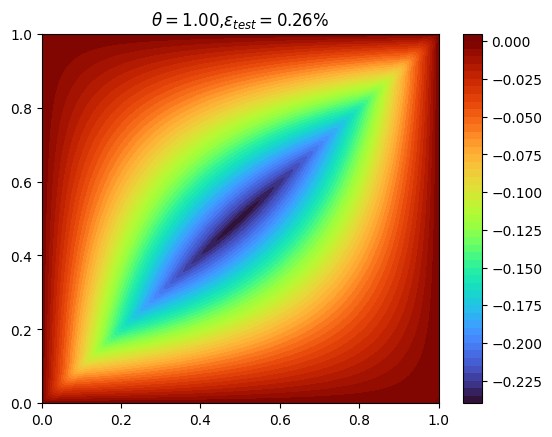

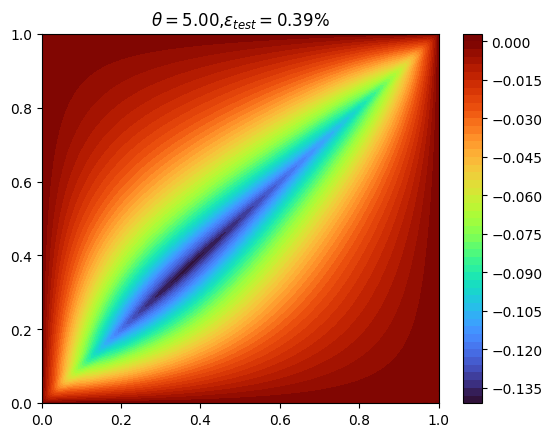

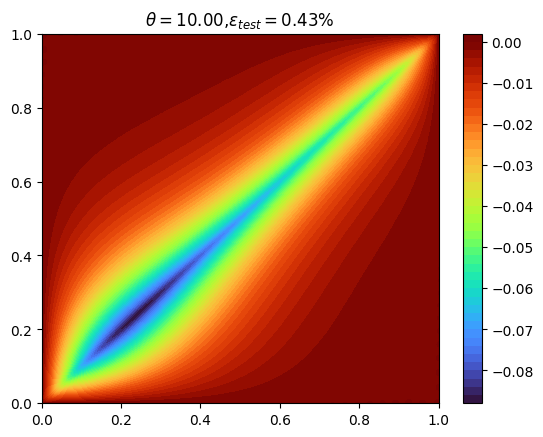

In [ ]:
%%time
for t in Theta:
    fig = plt.figure()
    model.G[t].plot(fig = fig)
    error = model.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

In [ ]:
%%time
u,s,v = model.G[1].svd()

CPU times: user 901 ms, sys: 13.6 ms, total: 914 ms
Wall time: 916 ms


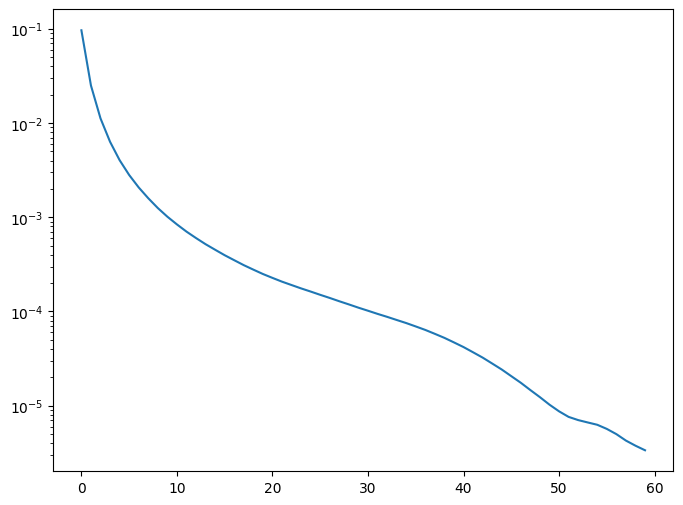

In [ ]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(0.0, 1.0)

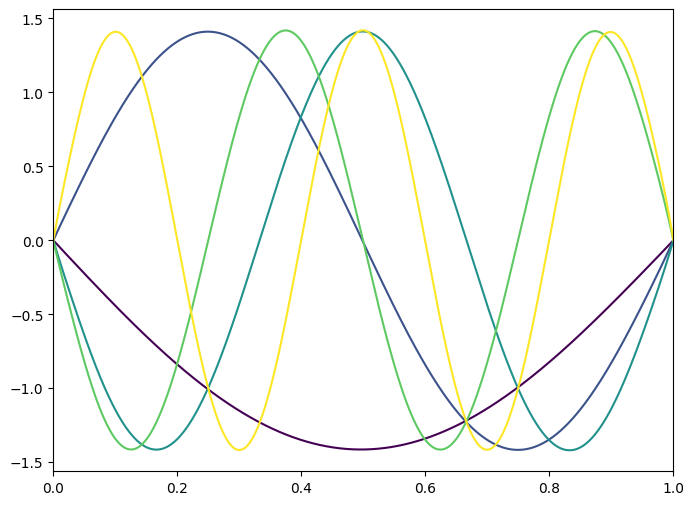

In [ ]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [ ]:
%%time
Ginterp, Ninterp = model.generateNewModel(theta_)

CPU times: user 5.96 s, sys: 100 ms, total: 6.06 s
Wall time: 6.1 s


In [ ]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'airy_equation'
Dataset found for Theta = 7.00. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Training greenlearning model for example 'airy_equation' at Theta = 7.00
Training with Adam:
Loss at epoch 100: Training = 2.534E-03, Validation = 3.044E-03
Loss at epoch 200: Training = 8.603E-04, Validation = 1.335E-03
Loss at epoch 300: Training = 5.153E-04, Validation = 8.914E-04
Loss at epoch 400: Training = 3.574E-04, Validation = 6.409E-04
Loss at epoch 500: Training = 2.699E-04, Validation = 4.646E-04
Loss at epoch 600: Training = 2.099E-04, Validation = 3.562E-04
Loss at epoch 700: Training = 1.844E-04, Validation = 3.062E-04
Loss at epoch 800: Training = 1.521E-04, Validation = 2.518E-04
Loss at epoch 900: Training = 1.232E-04, Validation = 2.023E-04
Loss at epoch 1000: Training = 1.039E-04, Validation = 1.691E-04
Loss at epoch 1100: Training = 8.356E-05, Validat

In [ ]:
# vmin, vmax = -0.24,0.03
# Gplot = validation.G[theta_]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# Gplot = Gplot[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,Gplot, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 6, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)

# fig.savefig('E.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)

Text(0.5, 1.0, 'Interpolated Model $\\theta = {7.00}$,$\\epsilon_{test} = {2.75}\\%$')

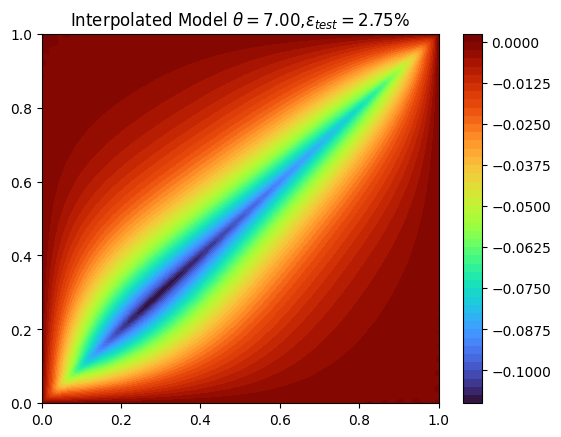

In [ ]:
fig = plt.figure()
Ginterp.plot(fig = fig)
error = model.computeEmpiricalError(theta_)
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

Text(0.5, 1.0, 'Validation Model $\\theta = {7.00}$,$\\epsilon_{test} = {0.36}\\%$')

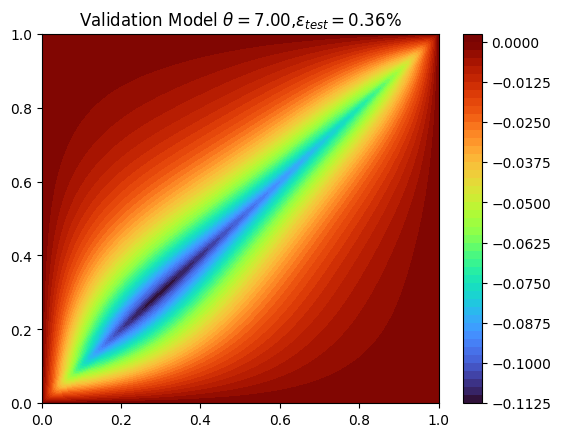

In [ ]:
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

In [ ]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

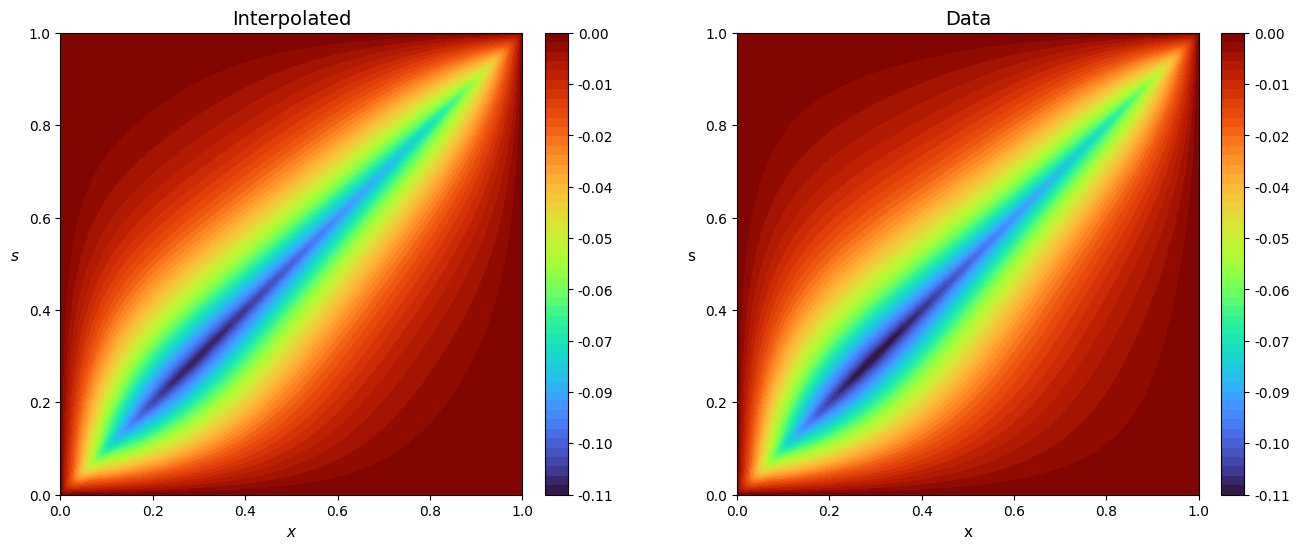

In [ ]:
compareGreen1D(Ginterp,validation.G[7])